In [ ]:
!git clone https://github.com/mbzuai-oryx/NestEO
!pip install -r NestEO/Requirements.txt
!pip install -e NestEO/.
import os
os.kill(os.getpid(), 9)



Cloning into 'NestEO'...
remote: Enumerating objects: 374, done.
remote: Counting objects: 100% (374/374), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 374 (delta 202), reused 349 (delta 177), pack-reused 0 (from 0)
Receiving objects: 100% (374/374), 4.07 MiB | 7.71 MiB/s, done.
Resolving deltas: 100% (202/202), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-geopandas to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.8 MB/s eta 0:00:00
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15543 sha256=d23f788bfc4e8d7c70e7d53a8df9521f36c135c19b223e3a6f700734d17

In [1]:
from NestEO.grid.grid_utils import *

In [2]:
import pandas as pd
df_select = pd.read_parquet("/content/drive/MyDrive/NestEO/sel_newsat_wyvern_1200m_dedup.parquet")

In [3]:
tile_ids_12000m = get_tile_lineage(df_select.tile_id.to_list(), levels=[12000])

In [11]:
tile_ids_12000m

{'G1200m_10N_X000455_Y004521': {12000: ['G12000m_10N_X000045_Y000452']},
 'G1200m_10N_X000355_Y006325': {12000: ['G12000m_10N_X000035_Y000632']},
 'G1200m_10N_X000409_Y006326': {12000: ['G12000m_10N_X000040_Y000632']},
 'G1200m_10N_X000408_Y006330': {12000: ['G12000m_10N_X000040_Y000633']},
 'G1200m_10N_X000430_Y006332': {12000: ['G12000m_10N_X000043_Y000633']},
 'G1200m_10N_X000380_Y006336': {12000: ['G12000m_10N_X000038_Y000633']},
 'G1200m_10N_X000381_Y006337': {12000: ['G12000m_10N_X000038_Y000633']},
 'G1200m_10N_X000420_Y006337': {12000: ['G12000m_10N_X000042_Y000633']},
 'G1200m_10N_X000433_Y006322': {12000: ['G12000m_10N_X000043_Y000632']},
 'G1200m_10N_X000381_Y006338': {12000: ['G12000m_10N_X000038_Y000633']},
 'G1200m_10N_X000380_Y006358': {12000: ['G12000m_10N_X000038_Y000635']},
 'G1200m_10N_X000388_Y006359': {12000: ['G12000m_10N_X000038_Y000635']},
 'G1200m_10N_X000398_Y006371': {12000: ['G12000m_10N_X000039_Y000637']},
 'G1200m_10N_X000530_Y003331': {12000: ['G12000m_10

In [11]:
df_select_12000m = df_select.copy()

In [12]:
df_select_12000m["tile_id"] = df_select_12000m["tile_id"].apply(lambda x: tile_ids_12000m[x][12000][0])

In [18]:
df_select_12000m.head(2)

,tile_id,epsg,utm_footprint,tile_group,date,datetime,subset_phase,subset_10k,subset_25k,shannon_entropy,...,Herbaceous Wetland,Mangroves,Moss and Lichen,Majority_LC,level,zone,x_idx,y_idx,buffer,overlap
0,G12000m_10N_X000045_Y000452,EPSG:32610,"POLYGON ((647200 5425200, 647200 5426400, 6460...",G1200m_10N,2021-10-18,NaT,25k_phase3,none,25k,1.586036,...,0.0,0.0,0.01514,Tree Cover,1200.0,10N,455.0,4521.0,0.0,0.0
1,G12000m_10N_X000035_Y000632,EPSG:32610,"POLYGON ((527200 7590000, 527200 7591200, 5260...",G1200m_10N,2021-09-22,NaT,25k_phase1,none,25k,0.000000,...,0.0,0.0,1.00000,Moss and Lichen,1200.0,10N,355.0,6325.0,0.0,0.0


In [16]:
import dask.dataframe as dd

# Login using e.g. `huggingface-cli login` to access this dataset
df = dd.read_parquet("hf://datasets/nesteo-datasets/nesteo-prototype/grids/grids_full/grid_12000m/*.parquet", columns = ['tile_id', 'geometry'])

In [17]:
df = df[df["tile_id"].isin(df_select_12000m.tile_id.to_list())]
df = df.compute()
len(df)

15653

In [22]:
df_select_12000m_dedup = df_select_12000m.drop_duplicates(subset='tile_id')

In [23]:
len(df_select_12000m_dedup)

15686

In [24]:
df_12000m = df_select_12000m_dedup.merge(df, on="tile_id", how="inner")
len(df_12000m)

15653

In [26]:
df_12000m.drop(columns=["utm_footprint"], inplace=True)

In [28]:
df_12000m.head()

,tile_id,epsg,tile_group,date,datetime,subset_phase,subset_10k,subset_25k,shannon_entropy,Open Seas,...,Mangroves,Moss and Lichen,Majority_LC,level,zone,x_idx,y_idx,buffer,overlap,geometry
0,G12000m_10N_X000045_Y000452,EPSG:32610,G1200m_10N,2021-10-18,NaT,25k_phase3,none,25k,1.586036,0.0,...,0.0,0.01514,Tree Cover,1200.0,10N,455.0,4521.0,0.0,0.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,G12000m_10N_X000035_Y000632,EPSG:32610,G1200m_10N,2021-09-22,NaT,25k_phase1,none,25k,0.000000,0.0,...,0.0,1.00000,Moss and Lichen,1200.0,10N,355.0,6325.0,0.0,0.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,G12000m_10N_X000040_Y000632,EPSG:32610,G1200m_10N,2023-12-02,NaT,25k_phase1,none,25k,0.000000,0.0,...,0.0,1.00000,Moss and Lichen,1200.0,10N,409.0,6326.0,0.0,0.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,G12000m_10N_X000040_Y000633,EPSG:32610,G1200m_10N,2021-09-16,NaT,25k_reuse,10k,25k,0.258606,0.0,...,0.0,0.95639,Moss and Lichen,1200.0,10N,408.0,6330.0,0.0,0.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,G12000m_10N_X000043_Y000633,EPSG:32610,G1200m_10N,2023-05-13,NaT,25k_reuse,10k,25k,0.000000,0.0,...,0.0,1.00000,Moss and Lichen,1200.0,10N,430.0,6332.0,0.0,0.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


In [29]:
import pandas as pd
import geopandas as gpd
from shapely import wkb

# Step 1: Initialize an empty list to hold per-zone GeoDataFrames
gdfs = []

# Step 2: Group by EPSG zone
for epsg_code, group in df_12000m.groupby("epsg"):
    # Extract numeric EPSG code (e.g., from 'EPSG:32610' → 32610)
    epsg_int = int(epsg_code.split(":")[1])

    # Convert 'geometry' from WKB to Shapely geometries
    group["geometry"] = group["geometry"].apply(wkb.loads)

    # Convert to GeoDataFrame with original CRS
    gdf = gpd.GeoDataFrame(group, geometry="geometry", crs=f"EPSG:{epsg_int}")

    # Reproject to WGS84
    gdf = gdf.to_crs(epsg=4326)

    # Append to list
    gdfs.append(gdf)

# Step 3: Concatenate all zone GeoDataFrames into one
gdf_wgs84 = pd.concat(gdfs, ignore_index=True)


In [32]:
gdf_wgs84.to_parquet("/content/drive/MyDrive/NestEO/selected_12000m.parquet")

In [31]:
gdf_wgs84.to_file("/content/drive/MyDrive/NestEO/selected_12000m.shp")

<ipython-input-31-abc338b7b216>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_wgs84.to_file("/content/drive/MyDrive/NestEO/selected_12000m.shp")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field datetime create as date field, though DateTime requested.
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'subset_phase' to 'subset_pha'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'shannon_entropy' to 'shannon_en'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Bare/Sparse Vegetation' to 'Bare/Spars'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Snow and Ice' to 'Snow and I'
  ogr_write(
/usr/local/lib

In [ ]:
from urllib.request import urlretrieve
import os

In [ ]:
path = "/content/drive/MyDrive/Wyvern_Data_Download/"

In [ ]:
urls = ['https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240802T063254_fe587307/fe587307-86df-4eff-bdbc-2747a0b8404e.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240902T015820_c8ba843e/c8ba843e-0312-453f-903e-253bc72edecd.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241026T073007_1f933ec9/1f933ec9-976e-43d2-8dc6-ad60424a805a.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241119T093344_cecbee64/cecbee64-4fed-4ca9-b846-39339595f05a.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240808T171453_20e65134/20e65134-4a42-4d77-bc52-2c15a35b1cf6.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240816T065054_0e692903/0e692903-2e69-43a5-8a74-56040c02bcaf.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-003_20241206T203812_64e116d6/64e116d6-f7f0-432c-88e1-449e546e3aa4.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240930T070744_08fd7f5a/08fd7f5a-d783-4262-8f1d-5865e1c27a7d.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240924T043743_be250f77/be250f77-2a7e-47f4-94ec-b55334654332.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240628T062939_5fce57a3/5fce57a3-4c6f-447a-bfb0-45de801bf3da.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240614T043114_805f0bb7/805f0bb7-2059-45a9-9db4-e0228a9fcd06.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-003_20241224T002812_069c301b/069c301b-213c-4540-90f3-c34f283ee639.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241024T092200_c874e0e3/c874e0e3-1623-4afe-8a59-e106f656b379.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240703T171837_4c406dd3/4c406dd3-addd-4e41-a22b-04f06f5703c7.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-003_20241229T165203_12324bcb/12324bcb-f3f7-4f18-bdde-acf9e4129136.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241219T073000_833394ce/833394ce-2b20-4061-8c3d-479c6c8e8b9c.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241104T173856_870d7461/870d7461-f4c2-4850-9794-ea933480d6f1.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240709T145146_1e79473a/1e79473a-74f4-4053-a2db-f7d5cab34ef1.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240823T172127_4ef5c7ec/4ef5c7ec-c86b-435a-8c78-c9f515217172.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241107T060700_4e89ebe5/4e89ebe5-4f1c-4c2b-a894-108370e1e40a.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240811T083914_08c61457/08c61457-6c6f-4acf-a847-02f2ce10ca02.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-003_20241229T103412_4fb7ca06/4fb7ca06-77aa-44dd-be05-4d9f7d9da9af.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240808T073501_51b92993/51b92993-5991-4775-9c2c-52a0870bb878.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240620T145630_2d5d0eef/2d5d0eef-7fd3-4215-8d92-50dd4a39e97f.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240608T144036_fa4c4f71/fa4c4f71-7ca4-4d75-ad58-07e319826be7.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240627T081339_42e036ec/42e036ec-ce4a-4427-9674-f7d13dff06a2.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240924T060726_6131fb18/6131fb18-1899-4c79-ae6b-151ca9994d5a.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240806T172508_6b59089b/6b59089b-9d23-4f86-a3ee-210418bfca47.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20241003T001114_b9b1a0b8/b9b1a0b8-ea4a-4fe4-892a-c9e877a2ca5c.zip',
 'https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240728T084002_5e95f389/5e95f389-df7d-4fa2-8e60-46e87bdc46f2.zip']

urls = list(set(urls))
len(urls)


30

In [ ]:
urls_2025 = [
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250101T072826_f3aa9cc0/f3aa9cc0-3622-4711-a729-41e573a316f3.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250101T201001_5dc97ba2/5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250123T172439_ec97451b/ec97451b-9294-422d-90f7-0ed9cbd4a817.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250124T171659_0bb0a026/0bb0a026-e732-4a4a-9b66-b6f38dc7d160.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250127T021633_c94c1fd6/c94c1fd6-55fc-4582-9dee-269f8b47e534.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250202T013329_a6b233a1/a6b233a1-447a-4e28-9db1-4047c97d6f10.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-003_20250128T005455_e8a5c3ba/e8a5c3ba-90de-44d9-bae2-4fd553f0cf29.zip",
    "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-003_20250327T154740_8e6a3172/8e6a3172-0c49-4679-ac5b-7ec7ca4eaafa.zip",
]

In [ ]:
import os
import requests
from urllib.request import urlretrieve

for url in urls:
    # Extract filename from URL
    filename = os.path.basename(url)
    filepath = os.path.join(path, filename)

    # Get remote file size
    try:
        response = requests.head(url, allow_redirects=True)
        remote_size = int(response.headers.get("Content-Length", -1))
    except Exception as e:
        print(f"Failed to get remote file size for {url}: {e}")
        remote_size = -1

    if os.path.exists(filepath):
        local_size = os.path.getsize(filepath)
        if remote_size != -1 and local_size == remote_size:
            print(f"File {filepath} already exists and matches remote size. Skipping download.")
            continue
        else:
            print(f"File {filepath} exists but size mismatch. Re-downloading.")

    # Download and save the file
    try:
        print(url)
        urlretrieve(url, filepath)
        print(f"Downloaded {filename}")
    except Exception as e:
        print(f"Failed to download {url}: {e}")


https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250101T072826_f3aa9cc0/f3aa9cc0-3622-4711-a729-41e573a316f3.zip
Downloaded f3aa9cc0-3622-4711-a729-41e573a316f3.zip
https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250101T201001_5dc97ba2/5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f.zip
Downloaded 5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f.zip
https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250123T172439_ec97451b/ec97451b-9294-422d-90f7-0ed9cbd4a817.zip
Downloaded ec97451b-9294-422d-90f7-0ed9cbd4a817.zip
https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250124T171659_0bb0a026/0bb0a026-e732-4a4a-9b66-b6f38dc7d160.zip
Downloaded 0bb0a026-e732-4a4a-9b66-b6f38dc7d160.zip
https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20250127T021633_c94c1fd6/c94c1fd6-55fc-4582

In [ ]:
# import os
# import glob

# # Define base directory containing the ZIP files
# base_dir = "/content/drive/MyDrive/Wyvern_Data_Download"
# out_dir = "/content"

# # Get all ZIP files in the directory
# zip_files = glob.glob(os.path.join(base_dir, "*.zip"))

# # Unzip each file to the same base directory
# for i, zip_path in enumerate(zip_files):
#     if i > 5:
#       break
#     print(f"Unzipping {zip_path}...")
#     # unzip_cmd = f'unzip -o "{zip_path}" -d "{base_dir}"'
#     unzip_cmd = f'unzip -o "{zip_path}" -d "{out_dir}"'
#     os.system(unzip_cmd)
#     break

Unzipping /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7.zip...


In [ ]:
from math import nan
import json
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import glob
from pathlib import Path
import numpy as np

def extract_band_features(bands):
    """Extract band-specific metadata into flat dictionary with clear keys."""
    band_dict = {}
    for band in bands:
        band_name = band.get("name", "").lower().replace("band_", "").replace(" ", "_")
        prefix = f"band_{band_name}"

        band_dict[f"{prefix}_common_name"] = band.get("common_name")
        band_dict[f"{prefix}_center_wavelength"] = band.get("center_wavelength")
        band_dict[f"{prefix}_full_width_half_max"] = band.get("full_width_half_max")
        band_dict[f"{prefix}_solar_illumination"] = band.get("solar_illumination")

    return band_dict

def flatten_json(json_obj):
    """Flatten STAC JSON object into a single flat dictionary suitable for tabular export."""
    flat = {}

    flat['scene_id'] = json_obj.get('id')
    flat['stac_version'] = json_obj.get('stac_version')
    flat['stac_extensions'] = json_obj.get('stac_extensions')
    flat['bbox'] = json_obj.get('bbox')
    flat['geometry'] = json.dumps(json_obj.get('geometry'))  # optionally keep as JSON string

    # Properties
    props = json_obj.get('properties', {})
    # print(props)
    for k, v in props.items():
        flat[k.replace(':', '_')] = v

    # Provider Info
    providers = props.get('providers', [])
    flat['provider_names'] = [p.get('name') for p in providers]
    flat['provider_roles'] = [p.get('roles') for p in providers]
    flat['provider_urls'] = [p.get('url') for p in providers]

    # Assets and Bands
    assets = json_obj.get('assets', {})
    flat['asset_keys'] = list(assets.keys())
    flat['asset_hrefs'] = [v.get('href') for v in assets.values()]

    # Find the asset with full eo:bands (usually "Cloud optimized GeoTiff")
    # for asset in assets.values():
    #     if "eo:bands" in asset:
    #         bands_metadata = extract_band_features(asset["eo:bands"])
    #         flat.update(bands_metadata)
    #         break

    return flat

def process_json_folder(json_folder, output_parquet):
    """Convert a folder of STAC JSONs into a flat, filterable Parquet file."""
    json_paths = list(Path(json_folder).rglob("*.json"))
    # json_paths = glob.glob(str(Path(json_folder) / "*.json"))
    records = []

    for path in json_paths:
        with open(path, 'r', encoding='utf-8') as f:
            json_data = json.load(f)
            flat = flatten_json(json_data)
            records.append(flat)

    df = pd.DataFrame(records)
    table = pa.Table.from_pandas(df)
    pq.write_table(table, output_parquet)
    print(f"✅ Parquet written to: {output_parquet} with {len(df)} scenes.")

# Example usage
json_folder = '/content/drive/MyDrive/Wyvern_Data_Jsons'  # or your local directory
output_parquet = '/content/drive/MyDrive/Wyvern_Data_Jsons/wyvern_scenes_params.parquet'
process_json_folder(json_folder, output_parquet)



✅ Parquet written to: /content/drive/MyDrive/Wyvern_Data_Jsons/wyvern_scenes_params.parquet with 38 scenes.


In [ ]:
import pandas as pd
met = pd.read_parquet(output_parquet)
met.head(2)

,scene_id,stac_version,stac_extensions,bbox,geometry,processing_level,processing_facility,processing_version,wyvern_radiometric_resolution,license,...,eo_cloud_cover,sensor_mode,sensor_type,product_type,datetime,provider_names,provider_roles,provider_urls,asset_keys,asset_hrefs
0,wyvern_dragonette-001_20240608T144036_fa4c4f71,1.0.0,[https://stac-extensions.github.io/processing/...,"[-74.15754804141113, 40.55957015316746, -73.79...","{""type"": ""Polygon"", ""coordinates"": [[[-74.1425...",L1B,Wyvern,1.4,12,proprietary,...,15.3,strip,optical,hyperspectral,2024-06-08T14:40:38.602172Z,[Wyvern Inc.],"[[licensor, producer, processor]]",[https://www.wyvern.space/],"[Cloud optimized GeoTiff, Overview image, Thum...",[./wyvern_dragonette-001_20240608T144036_fa4c4...
1,wyvern_dragonette-001_20240614T043114_805f0bb7,1.0.0,[https://stac-extensions.github.io/processing/...,"[81.4334808534443, 24.272896529431748, 81.7082...","{""type"": ""Polygon"", ""coordinates"": [[[81.43427...",L1B,Wyvern,1.4,12,proprietary,...,0.0,strip,optical,hyperspectral,2024-06-14T04:31:16.591489Z,[Wyvern Inc.],"[[licensor, producer, processor]]",[https://www.wyvern.space/],"[Cloud optimized GeoTiff, Overview image, Thum...",[./wyvern_dragonette-001_20240614T043114_805f0...


In [ ]:
met.columns

Index(['scene_id', 'stac_version', 'stac_extensions', 'bbox', 'geometry',
       'processing_level', 'processing_facility', 'processing_version',
       'wyvern_radiometric_resolution', 'license',
       ...
       'band_832nm_full_width_half_max', 'band_832nm_solar_illumination',
       'band_849nm_common_name', 'band_849nm_center_wavelength',
       'band_849nm_full_width_half_max', 'band_849nm_solar_illumination',
       'band_869nm_common_name', 'band_869nm_center_wavelength',
       'band_869nm_full_width_half_max', 'band_869nm_solar_illumination'],
      dtype='object', length=209)

In [ ]:
import os
import requests
from urllib.request import urlretrieve

for url in urls_2025:
    # Extract filename from URL
    filename = os.path.basename(url)
    filepath = os.path.join(path, filename)

    # Get remote file size
    try:
        response = requests.head(url, allow_redirects=True)
        remote_size = int(response.headers.get("Content-Length", -1))
    except Exception as e:
        print(f"Failed to get remote file size for {url}: {e}")
        remote_size = -1

    if os.path.exists(filepath):
        local_size = os.path.getsize(filepath)
        if remote_size != -1 and local_size == remote_size:
            print(f"File {filepath} already exists and matches remote size. Skipping download.")
            continue
        else:
            print(f"File {filepath} exists but size mismatch. Re-downloading.")

    # Download and save the file
    try:
        print(url)
        urlretrieve(url, filepath)
        print(f"Downloaded {filename}")
    except Exception as e:
        print(f"Failed to download {url}: {e}")


In [ ]:
# !unzip /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7.zip -d /content/drive/MyDrive/Wyvern_Data_Download/

Archive:  /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7.zip
  inflating: /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7/catalog.json  
  inflating: /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7/wyvern_dragonette-001_20240608T144036_fa4c4f71/wyvern_dragonette-001_20240608T144036_fa4c4f71.json  
  inflating: /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7/wyvern_dragonette-001_20240608T144036_fa4c4f71/wyvern_dragonette-001_20240608T144036_fa4c4f71.tiff  
  inflating: /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7/wyvern_dragonette-001_20240608T144036_fa4c4f71/wyvern_dragonette-001_20240608T144036_fa4c4f71_data_mask.tiff  
  inflating: /content/drive/MyDrive/Wyvern_Data_Download/fa4c4f71-7ca4-4d75-ad58-07e319826be7/wyvern_dragonette-001_20240608T144036_fa4c4f71/wyvern_dragonette-001_20240608T144036_fa4c4f71_pixel_quality

## Get All Jsons

In [ ]:
import zipfile
import os
from pathlib import Path

# Set your input and output folders
input_folder = '/content/drive/MyDrive/Wyvern_Data_Download'  # folder containing zip files
output_folder = '/content/drive/MyDrive/Wyvern_Data_Jsons'  # where to extract jsons
os.makedirs(output_folder, exist_ok=True)

# Loop through each .zip file in the input folder
for zip_path in Path(input_folder).glob('*.zip'):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # Extract only .json files
        for file in z.namelist():
            if file.endswith('.json') and not file.endswith("catalog.json"):
                z.extract(file, path=output_folder)


In [ ]:
import os
import json
import geopandas as gpd
from shapely.geometry import shape
from pathlib import Path
from tqdm import tqdm

def collect_json_metadata(base_dir):
    base_dir = Path(base_dir)
    rows = []

    # Recursively find all .json files
    json_files = list(base_dir.rglob('*.json'))
    print(f"Found {len(json_files)} JSON files in {base_dir}")
    for jf in tqdm(json_files, desc="Processing JSONs"):
        try:
            with open(jf) as f:
                meta = json.load(f)

            scene_id = meta["id"]
            geom = shape(meta["geometry"])
            start_dt = meta["properties"].get("start_datetime")
            end_dt = meta["properties"].get("end_datetime")
            rel_path = jf.relative_to(base_dir).as_posix()

            rows.append({
                "scene_id": scene_id,
                "geometry": geom,
                "start_datetime": start_dt,
                "end_datetime": end_dt,
                "json_path": rel_path
            })

        except Exception as e:
            print(f"Failed to process {jf}: {e}")

    return gpd.GeoDataFrame(rows, crs="EPSG:4326")

# Example usage:
gdf = collect_json_metadata('/content/drive/MyDrive/Wyvern_Data_Jsons/')


Found 38 JSON files in /content/drive/MyDrive/Wyvern_Data_Jsons


Processing JSONs: 100%|██████████| 38/38 [00:10<00:00,  3.53it/s]


In [ ]:
# save for later reuse
gdf.to_parquet("/content/drive/MyDrive/Wyvern_Data_Jsons/wyvern_metadata_24_25.parquet")

In [ ]:
import geopandas as gpd
gdf = gpd.read_parquet("/content/drive/MyDrive/Wyvern_Data_Jsons/wyvern_metadata_24_25.parquet")
gdf.head(2)

,scene_id,geometry,start_datetime,end_datetime,json_path
0,wyvern_dragonette-001_20240608T144036_fa4c4f71,"POLYGON ((-74.14257 40.8525, -74.14257 40.8525...",2024-06-08T14:40:36.369389Z,2024-06-08T14:40:40.834955Z,fa4c4f71-7ca4-4d75-ad58-07e319826be7/wyvern_dr...
1,wyvern_dragonette-001_20240614T043114_805f0bb7,"POLYGON ((81.43427 24.57561, 81.43427 24.5757,...",2024-06-14T04:31:14.311271Z,2024-06-14T04:31:18.871706Z,805f0bb7-2059-45a9-9db4-e0228a9fcd06/wyvern_dr...


In [ ]:
len(gdf)

38

In [ ]:
gdf.columns

Index(['scene_id', 'geometry', 'start_datetime', 'end_datetime', 'json_path'], dtype='object')

In [ ]:
gdf25 = gdf[gdf["start_datetime"].astype(str).str.startswith('2025')].copy()


In [ ]:
gdf = gdf25.copy()

## Creating Grid Files for each image footprint

In [ ]:
import yaml
from pathlib import Path
from NestEO.grid import NestEOGrid

In [ ]:
import os
from pathlib import Path
import geopandas as gpd
from tqdm import tqdm

# === Assumes HenarcmeoGrid is already imported ===

def get_utm_zones_from_bounds(bounds):
    """
    Get UTM zones with hemisphere from bounds (left, bottom, right, top).
    Returns list like ["18N"] or ["33S"]
    """
    lon_min, lat_min, lon_max, lat_max = bounds
    zone_min = int((lon_min + 180) // 6) + 1
    zone_max = int((lon_max + 180) // 6) + 1

    lat_center = (lat_min + lat_max) / 2
    hemi = "N" if lat_center >= 0 else "S"

    return [f"{zone}{hemi}" for zone in range(zone_min, zone_max + 1)]

def generate_grids_from_gdf(gdf, base_output_dir_2400, base_output_dir_1200):
    for idx, row in tqdm(gdf.iterrows(), total=len(gdf), desc="Generating grids"):
        bounds = row.geometry.bounds  # (left, bottom, right, top)
        latlon_bounds = [bounds[0], bounds[1], bounds[2], bounds[3]]
        json_path = row.json_path

        utm_zones = get_utm_zones_from_bounds(bounds)

        output_dir_2400 = Path(base_output_dir_2400) / Path(json_path.replace(".json", ""))
        output_dir_1200 = Path(base_output_dir_1200) / Path(json_path.replace(".json", ""))
        os.makedirs(output_dir_2400, exist_ok=True)
        os.makedirs(output_dir_1200, exist_ok=True)

        grid_2400 = NestEOGrid(
            latlon_bounds=latlon_bounds,
            levels=[2400],
            utm_zones=utm_zones,
            include_polar=False,
            save_geohash=False,
            save_single_file=False,
            save_wgs_files=False,
            output_dir=str(output_dir_2400),
            output_format="PARQUET",
            skip_existing=True,
            ref_level=None,
            ref_dir=None,
            generate=False,
        )
        grid_2400.run()

        grid_1200 = NestEOGrid(
            latlon_bounds=latlon_bounds,
            levels=[1200],
            utm_zones=utm_zones,
            include_polar=False,
            save_geohash=False,
            save_single_file=False,
            save_wgs_files=False,
            output_dir=str(output_dir_1200),
            output_format="PARQUET",
            skip_existing=True,
            ref_level=None,
            ref_dir=None,
            generate=False,
        )
        grid_1200.run()

# === Example usage ===
generate_grids_from_gdf(
    gdf=gdf,
    base_output_dir_2400="/content/drive/MyDrive/Wyvern_Data_Grids/",
    base_output_dir_1200="/content/drive/MyDrive/Wyvern_Data_Grids/"
)


Generating grids:   0%|          | 0/8 [00:00<?, ?it/s]

Generating grid for level 2400...
Generating UTM zones: ['36N']

Working on 36N with epsg:32636
Grid X and Y shape:  (234,) (234,)
Valid X and Y shape: (234,) (234,)
Valid X and Y shape after LC filter: (234,) (234,)
Filtering to UTM zone 36N — Pre-filtering 234 tiles
Kept from centroid check: 234, border cases: 0
Final tile count after precise filter: 234
Zone 36N: 234 tiles, CRS: EPSG:32636
Saving 36N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/f3aa9cc0-3622-4711-a729-41e573a316f3/wyvern_dragonette-001_20250101T072826_f3aa9cc0/wyvern_dragonette-001_20250101T072826_f3aa9cc0/grid_2400m/grid_36N_2400.parquet
Zone 36N generation time: 1.88 seconds

 ### Level 2400 generation complete. ###


 ### Level 2400 tile index exported. ###

Generating grid for level 1200...
Generating UTM zones: ['36N']

Working on 36N with epsg:32636
Grid X and Y shape:  (875,) (875,)
Valid X and Y shape: (875,) (875,)
Valid X and Y shape after LC filter: (875,) (875,)
Filtering t

Generating grids:  12%|█▎        | 1/8 [00:02<00:17,  2.49s/it]

Zone 36N: 875 tiles, CRS: EPSG:32636
Saving 36N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/f3aa9cc0-3622-4711-a729-41e573a316f3/wyvern_dragonette-001_20250101T072826_f3aa9cc0/wyvern_dragonette-001_20250101T072826_f3aa9cc0/grid_1200m/grid_36N_1200.parquet
Zone 36N generation time: 0.59 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['4N']

Working on 4N with epsg:32604
Grid X and Y shape:  (180,) (180,)
Valid X and Y shape: (180,) (180,)
Valid X and Y shape after LC filter: (180,) (180,)
Filtering to UTM zone 4N — Pre-filtering 180 tiles
Kept from centroid check: 180, border cases: 0
Final tile count after precise filter: 180
Zone 4N: 180 tiles, CRS: EPSG:32604
Saving 4N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f/wyvern_dragonette-001_20250101T201001_5dc97ba2/wyvern_dragonette-001_202

Generating grids:  25%|██▌       | 2/8 [00:03<00:09,  1.62s/it]

Zone 4N: 667 tiles, CRS: EPSG:32604
Saving 4N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f/wyvern_dragonette-001_20250101T201001_5dc97ba2/wyvern_dragonette-001_20250101T201001_5dc97ba2/grid_1200m/grid_4N_1200.parquet
Zone 4N generation time: 0.54 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['11N']

Working on 11N with epsg:32611
Grid X and Y shape:  (234,) (234,)
Valid X and Y shape: (234,) (234,)
Valid X and Y shape after LC filter: (234,) (234,)
Filtering to UTM zone 11N — Pre-filtering 234 tiles
Kept from centroid check: 234, border cases: 0
Final tile count after precise filter: 234
Zone 11N: 234 tiles, CRS: EPSG:32611
Saving 11N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/ec97451b-9294-422d-90f7-0ed9cbd4a817/wyvern_dragonette-001_20250123T172439_ec97451b/wyvern_dragonette-001_20

Generating grids:  38%|███▊      | 3/8 [00:04<00:06,  1.37s/it]

Zone 11N: 850 tiles, CRS: EPSG:32611
Saving 11N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/ec97451b-9294-422d-90f7-0ed9cbd4a817/wyvern_dragonette-001_20250123T172439_ec97451b/wyvern_dragonette-001_20250123T172439_ec97451b/grid_1200m/grid_11N_1200.parquet
Zone 11N generation time: 0.60 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['11N']

Working on 11N with epsg:32611
Grid X and Y shape:  (195,) (195,)
Valid X and Y shape: (195,) (195,)
Valid X and Y shape after LC filter: (195,) (195,)
Filtering to UTM zone 11N — Pre-filtering 195 tiles
Kept from centroid check: 195, border cases: 0
Final tile count after precise filter: 195
Zone 11N: 195 tiles, CRS: EPSG:32611
Saving 11N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/0bb0a026-e732-4a4a-9b66-b6f38dc7d160/wyvern_dragonette-001_20250124T171659_0bb0a026/wyvern_dragonette-00

Generating grids:  50%|█████     | 4/8 [00:05<00:05,  1.27s/it]

Zone 11N: 750 tiles, CRS: EPSG:32611
Saving 11N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/0bb0a026-e732-4a4a-9b66-b6f38dc7d160/wyvern_dragonette-001_20250124T171659_0bb0a026/wyvern_dragonette-001_20250124T171659_0bb0a026/grid_1200m/grid_11N_1200.parquet
Zone 11N generation time: 0.62 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['50S']

Working on 50S with epsg:32750
Grid X and Y shape:  (280,) (280,)
Valid X and Y shape: (280,) (280,)
Valid X and Y shape after LC filter: (280,) (280,)
Filtering to UTM zone 50S — Pre-filtering 280 tiles
Kept from centroid check: 280, border cases: 0
Final tile count after precise filter: 280
Zone 50S: 280 tiles, CRS: EPSG:32750
Saving 50S to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/c94c1fd6-55fc-4582-9dee-269f8b47e534/wyvern_dragonette-001_20250127T021633_c94c1fd6/wyvern_dragonette-00

Generating grids:  62%|██████▎   | 5/8 [00:07<00:03,  1.29s/it]

Zone 50S: 1053 tiles, CRS: EPSG:32750
Saving 50S to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/c94c1fd6-55fc-4582-9dee-269f8b47e534/wyvern_dragonette-001_20250127T021633_c94c1fd6/wyvern_dragonette-001_20250127T021633_c94c1fd6/grid_1200m/grid_50S_1200.parquet
Zone 50S generation time: 0.80 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['52S']

Working on 52S with epsg:32752
Grid X and Y shape:  (169,) (169,)
Valid X and Y shape: (169,) (169,)
Valid X and Y shape after LC filter: (169,) (169,)
Filtering to UTM zone 52S — Pre-filtering 169 tiles
Kept from centroid check: 169, border cases: 0
Final tile count after precise filter: 169
Zone 52S: 169 tiles, CRS: EPSG:32752
Saving 52S to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/a6b233a1-447a-4e28-9db1-4047c97d6f10/wyvern_dragonette-001_20250202T013329_a6b233a1/wyvern_dragonette-0

Generating grids:  75%|███████▌  | 6/8 [00:08<00:02,  1.32s/it]

Zone 52S: 600 tiles, CRS: EPSG:32752
Saving 52S to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/a6b233a1-447a-4e28-9db1-4047c97d6f10/wyvern_dragonette-001_20250202T013329_a6b233a1/wyvern_dragonette-001_20250202T013329_a6b233a1/grid_1200m/grid_52S_1200.parquet
Zone 52S generation time: 0.76 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['53S']

Working on 53S with epsg:32753
Grid X and Y shape:  (260,) (260,)
Valid X and Y shape: (260,) (260,)
Valid X and Y shape after LC filter: (260,) (260,)
Filtering to UTM zone 53S — Pre-filtering 260 tiles
Kept from centroid check: 260, border cases: 0
Final tile count after precise filter: 260
Zone 53S: 260 tiles, CRS: EPSG:32753
Saving 53S to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/e8a5c3ba-90de-44d9-bae2-4fd553f0cf29/wyvern_dragonette-003_20250128T005455_e8a5c3ba/wyvern_dragonette-00

Generating grids:  88%|████████▊ | 7/8 [00:09<00:01,  1.36s/it]

Zone 53S: 950 tiles, CRS: EPSG:32753
Saving 53S to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/e8a5c3ba-90de-44d9-bae2-4fd553f0cf29/wyvern_dragonette-003_20250128T005455_e8a5c3ba/wyvern_dragonette-003_20250128T005455_e8a5c3ba/grid_1200m/grid_53S_1200.parquet
Zone 53S generation time: 0.86 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###

Generating grid for level 2400...
Generating UTM zones: ['17N']

Working on 17N with epsg:32617
Grid X and Y shape:  (322,) (322,)
Valid X and Y shape: (322,) (322,)
Valid X and Y shape after LC filter: (322,) (322,)
Filtering to UTM zone 17N — Pre-filtering 322 tiles
Kept from centroid check: 322, border cases: 0
Final tile count after precise filter: 322
Zone 17N: 322 tiles, CRS: EPSG:32617
Saving 17N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/8e6a3172-0c49-4679-ac5b-7ec7ca4eaafa/wyvern_dragonette-003_20250327T154740_8e6a3172/wyvern_dragonette-00

Generating grids: 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]

Zone 17N: 1188 tiles, CRS: EPSG:32617
Saving 17N to PARQUET...
Saving to Parquet... /content/drive/MyDrive/Wyvern_Data_Grids/8e6a3172-0c49-4679-ac5b-7ec7ca4eaafa/wyvern_dragonette-003_20250327T154740_8e6a3172/wyvern_dragonette-003_20250327T154740_8e6a3172/grid_1200m/grid_17N_1200.parquet
Zone 17N generation time: 0.63 seconds

 ### Level 1200 generation complete. ###


 ### Level 1200 tile index exported. ###



In [ ]:

# # Set your input and output folders
# input_folder = '/content/drive/MyDrive/Wyvern_Data_Download'  # folder containing zip files
# output_folder = '/content/images'  # where to extract jsons
# os.makedirs(output_folder, exist_ok=True)

# # Loop through each .zip file in the input folder
# for zip_path in Path(input_folder).glob('*.zip'):
#     with zipfile.ZipFile(zip_path, 'r') as z:
#         # Extract only .json files
#         for file in z.namelist():
#             # if file.
#             # if file.endswith('.json') and not file.endswith("catalog.json"):
#             z.extract(file, path=output_folder)
#     break

## Clipping and Processing..

In [ ]:
# Trying for exact size 480

import json
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio.vrt import WarpedVRT
from rasterio.enums import Resampling
from shapely.geometry import shape
from tqdm import tqdm
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import zlib
from datetime import datetime
from pathlib import Path
import glob
import zipfile
import os
import shutil

def process_scene_to_parquet(
    gdf_row,
    json_root,
    image_root,
    grid_root,
    grid_level,
    output_parquet,
    clear_threshold=0.8,
    img_size = 480
):
    # === Construct paths ===
    scene_path = Path(json_root) / gdf_row["json_path"]
    scene_dir = scene_path.parent
    scene_json = scene_path
    stem = scene_json.stem.replace(".json", "")
    im_path = Path(image_root) / Path(gdf_row["json_path"].replace(".json", "")).parent
    image_path = im_path / f"{stem}.tiff"
    data_mask_path = im_path / f"{stem}_data_mask.tiff"
    quality_mask_path = im_path / f"{stem}_pixel_quality_mask.tiff"
    print(gdf_row["json_path"].replace(".json", ""))
    # === Locate matching grid parquet ===
    grid_folder = Path(grid_root) / Path(gdf_row["json_path"].replace(".json", "")) / f"grid_{grid_level}m"
    print(grid_folder)
    parquet_candidates = list(grid_folder.glob("grid*.parquet"))

    if not parquet_candidates:
        print(f"No grid parquet found at {grid_folder}")
        return

    grid_parquet = parquet_candidates[0]

    # === LOAD METADATA ===
    with open(scene_json) as f:
        meta = json.load(f)

    scene_id = meta["id"]
    scene_geom = shape(meta["geometry"])
    scene_crs = "EPSG:4326"
    start_dt = meta["properties"].get("start_datetime")
    end_dt = meta["properties"].get("end_datetime")

    # === LOAD GRID AND FILTER BY FULL COVERAGE ===
    grid = gpd.read_parquet(grid_parquet)
    grid = grid.set_geometry("geometry")
    grid_crs = grid.crs

    scene_gdf = gpd.GeoDataFrame([{"scene_id": scene_id, "geometry": scene_geom}], crs=scene_crs).to_crs(grid_crs)
    scene_poly = scene_gdf.geometry.iloc[0]

    intersecting = grid[
        (grid.geometry.intersects(scene_poly)) &
        (grid.geometry.centroid.within(scene_poly))
    ].copy()

    # === OPEN WARPED VRTs IN UTM CRS AT 5m ===
    def open_vrt(path, target_crs, target_res):
        src = rasterio.open(path)
        return WarpedVRT(
            src,
            crs=target_crs,
            resampling=Resampling.bilinear,
            xres=target_res,
            yres=target_res
        )

    vrt_img = open_vrt(str(image_path), grid_crs, 5.0)
    vrt_dmask = open_vrt(str(data_mask_path), grid_crs, 5.0)
    vrt_qmask = open_vrt(str(quality_mask_path), grid_crs, 5.0)

    def encode_array(arr):
        return zlib.compress(arr.tobytes())

    records = []
    nonclear = 0
    for idx, row in tqdm(intersecting.iterrows(), total=len(intersecting)):
        tile_id = row.tile_id

        from rasterio.windows import Window
        from rasterio.transform import rowcol

        tile_size_m = img_size * 5  # 2 400 m
        x0, y0, x1, y1 = row.geometry.bounds        # float bounds from GeoParquet

        # 1️⃣  snap lower-left to exact multiples of 2 400 m
        x0 = np.floor(x0 / tile_size_m) * tile_size_m
        y0 = np.floor(y0 / tile_size_m) * tile_size_m
        x1 = x0 + tile_size_m
        y1 = y0 + tile_size_m

        # 2️⃣  convert snapped bounds to row/col offsets in VRT grid
        #     (upper-left corner → y1 is top, x0 is left)
        vrt_tr = vrt_img.transform
        row_off, col_off = rowcol(vrt_tr, x0, y1, op=round)

        # 3️⃣  build fixed 480 × 480 window
        window = Window(col_off, row_off, img_size, img_size)

        # 4️⃣  read the imagery & masks
        try:
            img   = vrt_img.read(window=window, out_shape=(vrt_img.count, img_size, img_size))
            dmask = vrt_dmask.read(window=window, out_shape=(vrt_dmask.count, img_size, img_size))
            qmask = vrt_qmask.read(window=window, out_shape=(vrt_qmask.count, img_size, img_size))
        except Exception as e:
            print(f"Error on tile {tile_id}: {e}")
            continue

        if np.all(img == 0):
            continue

        # Check proportion of clear pixels (band 1 == 1)
        clear_pixels = np.count_nonzero(dmask[0] == 1)
        total_pixels = dmask.shape[1] * dmask.shape[2]
        clear_ratio = clear_pixels / total_pixels

        if clear_ratio < clear_threshold:
            print(f"Skipping {tile_id} due to low clear ratio: {clear_ratio:.2f}")
            nonclear+=1
            continue


        records.append({
            "tile_id": tile_id,
            "scene_id": scene_id,
            "start_datetime": datetime.fromisoformat(start_dt.replace("Z", "+00:00")),
            "end_datetime": datetime.fromisoformat(end_dt.replace("Z", "+00:00")),
            "image": encode_array(img.astype(np.float32)),
            "data_mask": encode_array(dmask.astype(np.uint8)),
            "pixel_quality_mask": encode_array(qmask.astype(np.uint8)),
            "shape": [img.shape[0], img.shape[1], img.shape[2]]
        })

    if not records:
        print(f"No valid tiles extracted for {scene_id}")
        return
    print(f"Nonclear grids below threshold {clear_threshold}: {nonclear}")
    # === WRITE WITH ROW GROUPS ===
    batch_size = 25
    schema = pa.schema([
        ("tile_id", pa.string()),
        ("scene_id", pa.string()),
        ("start_datetime", pa.timestamp("us")),
        ("end_datetime", pa.timestamp("us")),
        ("image", pa.binary()),
        ("data_mask", pa.binary()),
        ("pixel_quality_mask", pa.binary()),
        ("shape", pa.list_(pa.int32()))
    ])
    batches = [
        pa.RecordBatch.from_pydict({k: [r[k] for r in records[i:i + batch_size]] for k in records[0]}, schema=schema)
        for i in range(0, len(records), batch_size)
    ]

    writer = pq.ParquetWriter(output_parquet, schema=schema, compression="zstd")
    for batch in batches:
        writer.write_batch(batch)
    writer.close()


In [ ]:
shutil.rmtree(image_root)

In [ ]:
import zipfile
import shutil
import os
from pathlib import Path

# === Settings ===
input_folder = '/content/drive/MyDrive/Wyvern_Data_Download'
image_root = '/content/temp_scene_extract'
json_root = '/content/drive/MyDrive/Wyvern_Data_Jsons'
grid_root = '/content/drive/MyDrive/Wyvern_Data_Grids'
grid_level = 2400
output_base = f'/content/drive/MyDrive/Wyvern_Data_Parquets/grid_{grid_level}m'
os.makedirs(output_base, exist_ok=True)
# === Iterate through rows in gdf ===
early = 30
for i in range(len(gdf)):
    row = gdf.iloc[i]
    json_path = Path(row["json_path"])
    uuid_segment = json_path.parts[0]  # top-level folder is UUID

    # Skip if already processed
    output_path = Path(output_base) / f"Wyvern_{i+1+early}.parquet"
    if output_path.exists():
        print(f"[{i+1}] Already exists, skipping {output_path.name}")
        continue

    matching_zip = Path(input_folder) / f"{uuid_segment}.zip"
    if not matching_zip.exists():
        print(f"[{i+1}] ZIP not found for UUID: {uuid_segment}")
        continue

    print(f"\n[{i+1}] Extracting {matching_zip.name}")

    # Clear and extract
    shutil.rmtree(image_root, ignore_errors=True)
    os.makedirs(image_root, exist_ok=True)

    with zipfile.ZipFile(matching_zip, 'r') as z:
        z.extractall(image_root)

    # Process
    try:
        process_scene_to_parquet(
            gdf_row=row,
            json_root=json_root,
            image_root=image_root,
            grid_root=grid_root,
            grid_level=grid_level,
            output_parquet=str(output_path),
            clear_threshold=0.8,
            img_size=480
        )
    except Exception as e:
        print(f"[{i+1}] Failed on {uuid_segment}: {e}")

    shutil.rmtree(image_root, ignore_errors=True)



[1] Extracting f3aa9cc0-3622-4711-a729-41e573a316f3.zip
f3aa9cc0-3622-4711-a729-41e573a316f3/wyvern_dragonette-001_20250101T072826_f3aa9cc0/wyvern_dragonette-001_20250101T072826_f3aa9cc0
/content/drive/MyDrive/Wyvern_Data_Grids/f3aa9cc0-3622-4711-a729-41e573a316f3/wyvern_dragonette-001_20250101T072826_f3aa9cc0/wyvern_dragonette-001_20250101T072826_f3aa9cc0/grid_2400m


  1%|          | 1/142 [00:02<05:05,  2.17s/it]

Skipping G2400m_36N_X000144_Y001386 due to low clear ratio: 0.44


  1%|▏         | 2/142 [00:03<03:25,  1.47s/it]

Skipping G2400m_36N_X000145_Y001386 due to low clear ratio: 0.75


  2%|▏         | 3/142 [00:05<04:01,  1.74s/it]

Skipping G2400m_36N_X000144_Y001387 due to low clear ratio: 0.68


  6%|▋         | 9/142 [00:20<04:49,  2.17s/it]

Skipping G2400m_36N_X000150_Y001387 due to low clear ratio: 0.71


  7%|▋         | 10/142 [00:24<05:28,  2.49s/it]

Skipping G2400m_36N_X000143_Y001388 due to low clear ratio: 0.00


 14%|█▍        | 20/142 [00:55<06:22,  3.13s/it]

Skipping G2400m_36N_X000143_Y001389 due to low clear ratio: 0.08


 17%|█▋        | 24/142 [01:09<06:44,  3.43s/it]

Skipping G2400m_36N_X000148_Y001389 due to low clear ratio: 0.58


 20%|██        | 29/142 [01:22<05:33,  2.95s/it]

Skipping G2400m_36N_X000143_Y001390 due to low clear ratio: 0.29


 27%|██▋       | 38/142 [01:50<05:24,  3.12s/it]

Skipping G2400m_36N_X000143_Y001391 due to low clear ratio: 0.49


 33%|███▎      | 47/142 [02:19<05:17,  3.34s/it]

Skipping G2400m_36N_X000143_Y001392 due to low clear ratio: 0.66


 39%|███▉      | 56/142 [02:57<05:01,  3.51s/it]

Skipping G2400m_36N_X000142_Y001393 due to low clear ratio: 0.00


 46%|████▋     | 66/142 [03:30<03:51,  3.05s/it]

Skipping G2400m_36N_X000142_Y001394 due to low clear ratio: 0.09


 53%|█████▎    | 75/142 [03:59<03:13,  2.89s/it]

Skipping G2400m_36N_X000142_Y001395 due to low clear ratio: 0.29


 59%|█████▉    | 84/142 [04:29<03:17,  3.41s/it]

Skipping G2400m_36N_X000142_Y001396 due to low clear ratio: 0.49


 65%|██████▌   | 93/142 [05:04<03:07,  3.82s/it]

Skipping G2400m_36N_X000142_Y001397 due to low clear ratio: 0.69


 72%|███████▏  | 102/142 [05:35<02:04,  3.12s/it]

Skipping G2400m_36N_X000141_Y001398 due to low clear ratio: 0.00


 79%|███████▉  | 112/142 [06:12<01:33,  3.13s/it]

Skipping G2400m_36N_X000141_Y001399 due to low clear ratio: 0.08


 85%|████████▌ | 121/142 [06:39<01:02,  2.99s/it]

Skipping G2400m_36N_X000141_Y001400 due to low clear ratio: 0.28


 92%|█████████▏| 130/142 [07:08<00:35,  2.94s/it]

Skipping G2400m_36N_X000141_Y001401 due to low clear ratio: 0.21


 92%|█████████▏| 131/142 [07:10<00:27,  2.46s/it]

Skipping G2400m_36N_X000142_Y001401 due to low clear ratio: 0.60


 98%|█████████▊| 139/142 [07:34<00:08,  2.79s/it]

Skipping G2400m_36N_X000146_Y001402 due to low clear ratio: 0.46


 99%|█████████▊| 140/142 [07:35<00:04,  2.23s/it]

Skipping G2400m_36N_X000147_Y001402 due to low clear ratio: 0.67


100%|██████████| 142/142 [07:39<00:00,  3.24s/it]


Nonclear grids below threshold 0.8: 22

[2] Extracting 5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f.zip
5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f/wyvern_dragonette-001_20250101T201001_5dc97ba2/wyvern_dragonette-001_20250101T201001_5dc97ba2
/content/drive/MyDrive/Wyvern_Data_Grids/5dc97ba2-6fff-4cfe-9b8b-04fa467d0f3f/wyvern_dragonette-001_20250101T201001_5dc97ba2/wyvern_dragonette-001_20250101T201001_5dc97ba2/grid_2400m


  1%|          | 1/107 [00:02<03:39,  2.07s/it]

Skipping G2400m_4N_X000248_Y000968 due to low clear ratio: 0.35


  4%|▎         | 4/107 [00:10<04:20,  2.53s/it]

Skipping G2400m_4N_X000248_Y000969 due to low clear ratio: 0.57


 10%|█         | 11/107 [00:30<04:03,  2.54s/it]

Skipping G2400m_4N_X000255_Y000969 due to low clear ratio: 0.73


 11%|█         | 12/107 [00:34<04:23,  2.77s/it]

Skipping G2400m_4N_X000248_Y000970 due to low clear ratio: 0.78


 20%|█▉        | 21/107 [01:01<03:44,  2.61s/it]

Skipping G2400m_4N_X000247_Y000971 due to low clear ratio: 0.02


 28%|██▊       | 30/107 [01:32<03:56,  3.07s/it]

Skipping G2400m_4N_X000247_Y000972 due to low clear ratio: 0.21


 36%|███▋      | 39/107 [02:02<03:35,  3.16s/it]

Skipping G2400m_4N_X000247_Y000973 due to low clear ratio: 0.42


 45%|████▍     | 48/107 [02:34<03:02,  3.09s/it]

Skipping G2400m_4N_X000247_Y000974 due to low clear ratio: 0.63


 53%|█████▎    | 57/107 [03:07<03:16,  3.92s/it]

Skipping G2400m_4N_X000246_Y000975 due to low clear ratio: 0.00


 63%|██████▎   | 67/107 [03:45<01:56,  2.90s/it]

Skipping G2400m_4N_X000246_Y000976 due to low clear ratio: 0.08


 71%|███████   | 76/107 [04:18<01:34,  3.05s/it]

Skipping G2400m_4N_X000246_Y000977 due to low clear ratio: 0.32


 79%|███████▉  | 85/107 [04:54<01:13,  3.34s/it]

Skipping G2400m_4N_X000246_Y000978 due to low clear ratio: 0.57


 88%|████████▊ | 94/107 [05:25<00:41,  3.18s/it]

Skipping G2400m_4N_X000246_Y000979 due to low clear ratio: 0.60


 96%|█████████▋| 103/107 [06:00<00:15,  3.83s/it]

Skipping G2400m_4N_X000249_Y000980 due to low clear ratio: 0.40


 97%|█████████▋| 104/107 [06:03<00:10,  3.48s/it]

Skipping G2400m_4N_X000250_Y000980 due to low clear ratio: 0.51


 98%|█████████▊| 105/107 [06:05<00:05,  2.99s/it]

Skipping G2400m_4N_X000251_Y000980 due to low clear ratio: 0.40


100%|██████████| 107/107 [06:12<00:00,  3.48s/it]


Nonclear grids below threshold 0.8: 16

[3] Extracting ec97451b-9294-422d-90f7-0ed9cbd4a817.zip
ec97451b-9294-422d-90f7-0ed9cbd4a817/wyvern_dragonette-001_20250123T172439_ec97451b/wyvern_dragonette-001_20250123T172439_ec97451b
/content/drive/MyDrive/Wyvern_Data_Grids/ec97451b-9294-422d-90f7-0ed9cbd4a817/wyvern_dragonette-001_20250123T172439_ec97451b/wyvern_dragonette-001_20250123T172439_ec97451b/grid_2400m


  1%|          | 1/126 [00:03<07:26,  3.57s/it]

Skipping G2400m_11N_X000109_Y001563 due to low clear ratio: 0.50


  2%|▏         | 2/126 [00:06<06:08,  2.97s/it]

Skipping G2400m_11N_X000110_Y001563 due to low clear ratio: 0.77


  2%|▏         | 3/126 [00:11<08:32,  4.16s/it]

Skipping G2400m_11N_X000109_Y001564 due to low clear ratio: 0.74


  7%|▋         | 9/126 [00:39<08:09,  4.18s/it]

Skipping G2400m_11N_X000115_Y001564 due to low clear ratio: 0.72


  8%|▊         | 10/126 [00:40<06:30,  3.37s/it]

Skipping G2400m_11N_X000108_Y001565 due to low clear ratio: 0.00


 15%|█▌        | 19/126 [01:19<06:25,  3.60s/it]

Skipping G2400m_11N_X000108_Y001566 due to low clear ratio: 0.14


 22%|██▏       | 28/126 [02:02<06:56,  4.25s/it]

Skipping G2400m_11N_X000108_Y001567 due to low clear ratio: 0.34


 29%|██▉       | 37/126 [02:47<06:59,  4.72s/it]

Skipping G2400m_11N_X000108_Y001568 due to low clear ratio: 0.54


 30%|███       | 38/126 [02:51<06:15,  4.27s/it]

Skipping G2400m_11N_X000109_Y001568 due to low clear ratio: 0.79


 37%|███▋      | 46/126 [03:30<06:07,  4.59s/it]

Skipping G2400m_11N_X000108_Y001569 due to low clear ratio: 0.67


 43%|████▎     | 54/126 [04:04<04:18,  3.59s/it]

Skipping G2400m_11N_X000107_Y001570 due to low clear ratio: 0.00


 50%|█████     | 63/126 [05:00<04:48,  4.57s/it]

Skipping G2400m_11N_X000107_Y001571 due to low clear ratio: 0.14


 57%|█████▋    | 72/126 [05:52<04:40,  5.19s/it]

Skipping G2400m_11N_X000107_Y001572 due to low clear ratio: 0.34


 64%|██████▍   | 81/126 [06:40<03:22,  4.51s/it]

Skipping G2400m_11N_X000107_Y001573 due to low clear ratio: 0.54


 71%|███████▏  | 90/126 [07:20<02:34,  4.30s/it]

Skipping G2400m_11N_X000107_Y001574 due to low clear ratio: 0.73


 78%|███████▊  | 98/126 [07:59<01:55,  4.12s/it]

Skipping G2400m_11N_X000106_Y001575 due to low clear ratio: 0.00


 85%|████████▍ | 107/126 [08:47<01:23,  4.41s/it]

Skipping G2400m_11N_X000106_Y001576 due to low clear ratio: 0.11


 92%|█████████▏| 116/126 [09:33<00:46,  4.69s/it]

Skipping G2400m_11N_X000107_Y001577 due to low clear ratio: 0.47


 93%|█████████▎| 117/126 [09:35<00:35,  3.94s/it]

Skipping G2400m_11N_X000108_Y001577 due to low clear ratio: 0.67


 98%|█████████▊| 124/126 [10:07<00:08,  4.34s/it]

Skipping G2400m_11N_X000112_Y001578 due to low clear ratio: 0.48


 99%|█████████▉| 125/126 [10:11<00:04,  4.09s/it]

Skipping G2400m_11N_X000113_Y001578 due to low clear ratio: 0.63


100%|██████████| 126/126 [10:14<00:00,  4.87s/it]

Skipping G2400m_11N_X000114_Y001578 due to low clear ratio: 0.67
Nonclear grids below threshold 0.8: 22



[4] Extracting 0bb0a026-e732-4a4a-9b66-b6f38dc7d160.zip
0bb0a026-e732-4a4a-9b66-b6f38dc7d160/wyvern_dragonette-001_20250124T171659_0bb0a026/wyvern_dragonette-001_20250124T171659_0bb0a026
/content/drive/MyDrive/Wyvern_Data_Grids/0bb0a026-e732-4a4a-9b66-b6f38dc7d160/wyvern_dragonette-001_20250124T171659_0bb0a026/wyvern_dragonette-001_20250124T171659_0bb0a026/grid_2400m


  1%|          | 1/124 [00:04<10:04,  4.91s/it]

Skipping G2400m_11N_X000122_Y001569 due to low clear ratio: 0.71


  3%|▎         | 4/124 [00:12<05:15,  2.63s/it]

Skipping G2400m_11N_X000125_Y001569 due to low clear ratio: 0.79


  4%|▍         | 5/124 [00:13<04:06,  2.07s/it]

Skipping G2400m_11N_X000126_Y001569 due to low clear ratio: 0.72


  5%|▍         | 6/124 [00:16<04:36,  2.35s/it]

Skipping G2400m_11N_X000121_Y001570 due to low clear ratio: 0.01


 13%|█▎        | 16/124 [00:50<05:41,  3.16s/it]

Skipping G2400m_11N_X000121_Y001571 due to low clear ratio: 0.17


 21%|██        | 26/124 [01:23<05:11,  3.18s/it]

Skipping G2400m_11N_X000121_Y001572 due to low clear ratio: 0.39


 29%|██▉       | 36/124 [02:06<05:42,  3.89s/it]

Skipping G2400m_11N_X000121_Y001573 due to low clear ratio: 0.62


 37%|███▋      | 46/124 [02:41<03:58,  3.06s/it]

Skipping G2400m_11N_X000120_Y001574 due to low clear ratio: 0.00


 40%|███▉      | 49/124 [02:51<03:51,  3.09s/it]

Skipping G2400m_11N_X000123_Y001574 due to low clear ratio: 0.67


 46%|████▌     | 57/124 [03:18<03:41,  3.31s/it]

Skipping G2400m_11N_X000120_Y001575 due to low clear ratio: 0.06


 54%|█████▍    | 67/124 [03:52<02:54,  3.07s/it]

Skipping G2400m_11N_X000120_Y001576 due to low clear ratio: 0.27


 58%|█████▊    | 72/124 [04:08<02:29,  2.88s/it]

Skipping G2400m_11N_X000125_Y001576 due to low clear ratio: 0.44


 59%|█████▉    | 73/124 [04:10<02:21,  2.78s/it]

Skipping G2400m_11N_X000126_Y001576 due to low clear ratio: 0.47


 62%|██████▏   | 77/124 [04:21<02:13,  2.84s/it]

Skipping G2400m_11N_X000120_Y001577 due to low clear ratio: 0.47


 65%|██████▍   | 80/124 [04:32<02:16,  3.11s/it]

Skipping G2400m_11N_X000123_Y001577 due to low clear ratio: 0.61


 65%|██████▌   | 81/124 [04:34<02:02,  2.84s/it]

Skipping G2400m_11N_X000124_Y001577 due to low clear ratio: 0.44


 66%|██████▌   | 82/124 [04:38<02:09,  3.09s/it]

Skipping G2400m_11N_X000125_Y001577 due to low clear ratio: 0.79


 70%|███████   | 87/124 [04:58<02:34,  4.17s/it]

Skipping G2400m_11N_X000120_Y001578 due to low clear ratio: 0.67


 78%|███████▊  | 97/124 [05:32<01:20,  2.96s/it]

Skipping G2400m_11N_X000119_Y001579 due to low clear ratio: 0.00


 87%|████████▋ | 108/124 [06:10<00:47,  2.94s/it]

Skipping G2400m_11N_X000119_Y001580 due to low clear ratio: 0.08


 95%|█████████▌| 118/124 [06:39<00:16,  2.79s/it]

Skipping G2400m_11N_X000123_Y001581 due to low clear ratio: 0.49


 96%|█████████▌| 119/124 [06:40<00:11,  2.30s/it]

Skipping G2400m_11N_X000124_Y001581 due to low clear ratio: 0.70


100%|██████████| 124/124 [06:53<00:00,  3.33s/it]

Skipping G2400m_11N_X000128_Y001582 due to low clear ratio: 0.57
Nonclear grids below threshold 0.8: 23



[5] Extracting c94c1fd6-55fc-4582-9dee-269f8b47e534.zip
c94c1fd6-55fc-4582-9dee-269f8b47e534/wyvern_dragonette-001_20250127T021633_c94c1fd6/wyvern_dragonette-001_20250127T021633_c94c1fd6
/content/drive/MyDrive/Wyvern_Data_Grids/c94c1fd6-55fc-4582-9dee-269f8b47e534/wyvern_dragonette-001_20250127T021633_c94c1fd6/wyvern_dragonette-001_20250127T021633_c94c1fd6/grid_2400m


  1%|          | 1/161 [00:01<02:55,  1.10s/it]

Skipping G2400m_50S_X000265_Y-01485 due to low clear ratio: 0.01


  1%|          | 2/161 [00:03<04:20,  1.64s/it]

Skipping G2400m_50S_X000266_Y-01485 due to low clear ratio: 0.33


  2%|▏         | 3/161 [00:05<05:26,  2.07s/it]

Skipping G2400m_50S_X000267_Y-01485 due to low clear ratio: 0.18


  2%|▏         | 4/161 [00:06<04:32,  1.73s/it]

Skipping G2400m_50S_X000268_Y-01485 due to low clear ratio: 0.02


  3%|▎         | 5/161 [00:07<03:41,  1.42s/it]

Skipping G2400m_50S_X000265_Y-01484 due to low clear ratio: 0.15


  4%|▎         | 6/161 [00:09<03:57,  1.53s/it]

Skipping G2400m_50S_X000266_Y-01484 due to low clear ratio: 0.79


  6%|▌         | 9/161 [00:19<07:01,  2.78s/it]

Skipping G2400m_50S_X000269_Y-01484 due to low clear ratio: 0.80


  6%|▌         | 10/161 [00:21<06:35,  2.62s/it]

Skipping G2400m_50S_X000270_Y-01484 due to low clear ratio: 0.60


  7%|▋         | 11/161 [00:23<05:43,  2.29s/it]

Skipping G2400m_50S_X000271_Y-01484 due to low clear ratio: 0.41


  7%|▋         | 12/161 [00:24<04:50,  1.95s/it]

Skipping G2400m_50S_X000272_Y-01484 due to low clear ratio: 0.21


  8%|▊         | 13/161 [00:24<03:41,  1.50s/it]

Skipping G2400m_50S_X000273_Y-01484 due to low clear ratio: 0.03


  9%|▊         | 14/161 [00:27<04:09,  1.69s/it]

Skipping G2400m_50S_X000265_Y-01483 due to low clear ratio: 0.34


 13%|█▎        | 21/161 [01:01<10:26,  4.48s/it]

Skipping G2400m_50S_X000272_Y-01483 due to low clear ratio: 0.58


 14%|█▎        | 22/161 [01:06<10:44,  4.64s/it]

Skipping G2400m_50S_X000273_Y-01483 due to low clear ratio: 0.50


 14%|█▍        | 23/161 [01:09<09:28,  4.12s/it]

Skipping G2400m_50S_X000265_Y-01482 due to low clear ratio: 0.53


 18%|█▊        | 29/161 [01:38<09:39,  4.39s/it]

Skipping G2400m_50S_X000271_Y-01482 due to low clear ratio: 0.68


 19%|█▊        | 30/161 [01:41<08:41,  3.98s/it]

Skipping G2400m_50S_X000272_Y-01482 due to low clear ratio: 0.73


 19%|█▉        | 31/161 [01:46<09:12,  4.25s/it]

Skipping G2400m_50S_X000273_Y-01482 due to low clear ratio: 0.70


 20%|█▉        | 32/161 [01:50<09:01,  4.20s/it]

Skipping G2400m_50S_X000264_Y-01481 due to low clear ratio: 0.00
Skipping G2400m_50S_X000265_Y-01481 due to low clear ratio: 0.75


 24%|██▎       | 38/161 [02:20<10:44,  5.24s/it]

Skipping G2400m_50S_X000270_Y-01481 due to low clear ratio: 0.66


 24%|██▍       | 39/161 [02:23<09:23,  4.62s/it]

Skipping G2400m_50S_X000271_Y-01481 due to low clear ratio: 0.39


 25%|██▍       | 40/161 [02:26<08:21,  4.14s/it]

Skipping G2400m_50S_X000272_Y-01481 due to low clear ratio: 0.63


 25%|██▌       | 41/161 [02:31<08:59,  4.49s/it]

Skipping G2400m_50S_X000273_Y-01481 due to low clear ratio: 0.64


 26%|██▌       | 42/161 [02:35<08:40,  4.38s/it]

Skipping G2400m_50S_X000264_Y-01480 due to low clear ratio: 0.01


 27%|██▋       | 44/161 [02:39<06:15,  3.21s/it]

Skipping G2400m_50S_X000266_Y-01480 due to low clear ratio: 0.75


 30%|██▉       | 48/161 [02:56<06:57,  3.70s/it]

Skipping G2400m_50S_X000270_Y-01480 due to low clear ratio: 0.47


 30%|███       | 49/161 [02:59<06:58,  3.74s/it]

Skipping G2400m_50S_X000271_Y-01480 due to low clear ratio: 0.55


 32%|███▏      | 51/161 [03:07<06:33,  3.58s/it]

Skipping G2400m_50S_X000273_Y-01480 due to low clear ratio: 0.80


 32%|███▏      | 52/161 [03:13<08:19,  4.58s/it]

Skipping G2400m_50S_X000264_Y-01479 due to low clear ratio: 0.08
Skipping G2400m_50S_X000265_Y-01479 due to low clear ratio: 0.72


 35%|███▌      | 57/161 [03:38<08:47,  5.07s/it]

Skipping G2400m_50S_X000269_Y-01479 due to low clear ratio: 0.34


 36%|███▌      | 58/161 [03:42<08:37,  5.02s/it]

Skipping G2400m_50S_X000270_Y-01479 due to low clear ratio: 0.57


 37%|███▋      | 59/161 [03:46<07:58,  4.69s/it]

Skipping G2400m_50S_X000271_Y-01479 due to low clear ratio: 0.75


 37%|███▋      | 60/161 [03:50<07:19,  4.36s/it]

Skipping G2400m_50S_X000272_Y-01479 due to low clear ratio: 0.79


 38%|███▊      | 61/161 [03:58<08:58,  5.39s/it]

Skipping G2400m_50S_X000264_Y-01478 due to low clear ratio: 0.29
Skipping G2400m_50S_X000265_Y-01478 due to low clear ratio: 0.72


 41%|████      | 66/161 [04:20<07:19,  4.63s/it]

Skipping G2400m_50S_X000269_Y-01478 due to low clear ratio: 0.26


 42%|████▏     | 67/161 [04:24<07:16,  4.64s/it]

Skipping G2400m_50S_X000270_Y-01478 due to low clear ratio: 0.28


 42%|████▏     | 68/161 [04:28<06:57,  4.49s/it]

Skipping G2400m_50S_X000271_Y-01478 due to low clear ratio: 0.70


 43%|████▎     | 70/161 [04:42<08:47,  5.80s/it]

Skipping G2400m_50S_X000264_Y-01477 due to low clear ratio: 0.32
Skipping G2400m_50S_X000265_Y-01477 due to low clear ratio: 0.62


 45%|████▍     | 72/161 [04:46<05:52,  3.96s/it]

Skipping G2400m_50S_X000266_Y-01477 due to low clear ratio: 0.79


 46%|████▌     | 74/161 [04:56<06:25,  4.44s/it]

Skipping G2400m_50S_X000268_Y-01477 due to low clear ratio: 0.75


 47%|████▋     | 75/161 [04:59<05:58,  4.17s/it]

Skipping G2400m_50S_X000269_Y-01477 due to low clear ratio: 0.39


 47%|████▋     | 76/161 [05:03<05:38,  3.98s/it]

Skipping G2400m_50S_X000270_Y-01477 due to low clear ratio: 0.49


 48%|████▊     | 77/161 [05:08<06:05,  4.35s/it]

Skipping G2400m_50S_X000271_Y-01477 due to low clear ratio: 0.54


 49%|████▉     | 79/161 [05:16<05:43,  4.19s/it]

Skipping G2400m_50S_X000263_Y-01476 due to low clear ratio: 0.00


 50%|████▉     | 80/161 [05:19<05:12,  3.86s/it]

Skipping G2400m_50S_X000264_Y-01476 due to low clear ratio: 0.57


 52%|█████▏    | 84/161 [05:33<04:23,  3.42s/it]

Skipping G2400m_50S_X000268_Y-01476 due to low clear ratio: 0.76


 53%|█████▎    | 85/161 [05:37<04:42,  3.71s/it]

Skipping G2400m_50S_X000269_Y-01476 due to low clear ratio: 0.14


 53%|█████▎    | 86/161 [05:40<04:14,  3.40s/it]

Skipping G2400m_50S_X000270_Y-01476 due to low clear ratio: 0.34


 54%|█████▍    | 87/161 [05:42<03:51,  3.13s/it]

Skipping G2400m_50S_X000271_Y-01476 due to low clear ratio: 0.77


 55%|█████▍    | 88/161 [05:46<03:55,  3.22s/it]

Skipping G2400m_50S_X000272_Y-01476 due to low clear ratio: 0.79


 55%|█████▌    | 89/161 [05:52<05:02,  4.20s/it]

Skipping G2400m_50S_X000263_Y-01475 due to low clear ratio: 0.01


 58%|█████▊    | 94/161 [06:12<04:32,  4.06s/it]

Skipping G2400m_50S_X000268_Y-01475 due to low clear ratio: 0.65


 59%|█████▉    | 95/161 [06:16<04:25,  4.03s/it]

Skipping G2400m_50S_X000269_Y-01475 due to low clear ratio: 0.23


 60%|█████▉    | 96/161 [06:21<04:27,  4.11s/it]

Skipping G2400m_50S_X000270_Y-01475 due to low clear ratio: 0.63


 60%|██████    | 97/161 [06:24<04:03,  3.80s/it]

Skipping G2400m_50S_X000271_Y-01475 due to low clear ratio: 0.59


 61%|██████▏   | 99/161 [06:36<05:07,  4.97s/it]

Skipping G2400m_50S_X000263_Y-01474 due to low clear ratio: 0.09


 62%|██████▏   | 100/161 [06:39<04:33,  4.49s/it]

Skipping G2400m_50S_X000264_Y-01474 due to low clear ratio: 0.71


 65%|██████▍   | 104/161 [06:56<04:02,  4.26s/it]

Skipping G2400m_50S_X000268_Y-01474 due to low clear ratio: 0.46


 65%|██████▌   | 105/161 [07:01<04:17,  4.59s/it]

Skipping G2400m_50S_X000269_Y-01474 due to low clear ratio: 0.44


 66%|██████▌   | 106/161 [07:06<04:18,  4.70s/it]

Skipping G2400m_50S_X000270_Y-01474 due to low clear ratio: 0.76


 67%|██████▋   | 108/161 [07:18<04:43,  5.34s/it]

Skipping G2400m_50S_X000263_Y-01473 due to low clear ratio: 0.16


 68%|██████▊   | 109/161 [07:21<04:08,  4.77s/it]

Skipping G2400m_50S_X000264_Y-01473 due to low clear ratio: 0.54


 73%|███████▎  | 117/161 [08:02<03:57,  5.40s/it]

Skipping G2400m_50S_X000263_Y-01472 due to low clear ratio: 0.14


 73%|███████▎  | 118/161 [08:04<03:18,  4.63s/it]

Skipping G2400m_50S_X000264_Y-01472 due to low clear ratio: 0.70


 78%|███████▊  | 126/161 [08:40<02:45,  4.73s/it]

Skipping G2400m_50S_X000262_Y-01471 due to low clear ratio: 0.00


 79%|███████▉  | 127/161 [08:44<02:26,  4.30s/it]

Skipping G2400m_50S_X000263_Y-01471 due to low clear ratio: 0.63


 84%|████████▍ | 136/161 [09:27<02:01,  4.87s/it]

Skipping G2400m_50S_X000262_Y-01470 due to low clear ratio: 0.00


 85%|████████▌ | 137/161 [09:30<01:44,  4.35s/it]

Skipping G2400m_50S_X000263_Y-01470 due to low clear ratio: 0.65


 86%|████████▌ | 138/161 [09:34<01:34,  4.13s/it]

Skipping G2400m_50S_X000264_Y-01470 due to low clear ratio: 0.73


 91%|█████████ | 146/161 [10:14<01:22,  5.49s/it]

Skipping G2400m_50S_X000262_Y-01469 due to low clear ratio: 0.13


 92%|█████████▏| 148/161 [10:24<01:05,  5.02s/it]

Skipping G2400m_50S_X000264_Y-01469 due to low clear ratio: 0.75


100%|██████████| 161/161 [11:24<00:00,  4.25s/it]


Nonclear grids below threshold 0.8: 75

[6] Extracting a6b233a1-447a-4e28-9db1-4047c97d6f10.zip
a6b233a1-447a-4e28-9db1-4047c97d6f10/wyvern_dragonette-001_20250202T013329_a6b233a1/wyvern_dragonette-001_20250202T013329_a6b233a1
/content/drive/MyDrive/Wyvern_Data_Grids/a6b233a1-447a-4e28-9db1-4047c97d6f10/wyvern_dragonette-001_20250202T013329_a6b233a1/wyvern_dragonette-001_20250202T013329_a6b233a1/grid_2400m


  1%|          | 1/103 [00:00<01:16,  1.33it/s]

Skipping G2400m_52S_X000143_Y-00791 due to low clear ratio: 0.02


  2%|▏         | 2/103 [00:02<02:05,  1.24s/it]

Skipping G2400m_52S_X000143_Y-00790 due to low clear ratio: 0.63


  4%|▍         | 4/103 [00:07<03:16,  1.98s/it]

Skipping G2400m_52S_X000145_Y-00790 due to low clear ratio: 0.64


  5%|▍         | 5/103 [00:09<03:10,  1.94s/it]

Skipping G2400m_52S_X000146_Y-00790 due to low clear ratio: 0.43


  6%|▌         | 6/103 [00:09<02:32,  1.57s/it]

Skipping G2400m_52S_X000147_Y-00790 due to low clear ratio: 0.22


  7%|▋         | 7/103 [00:10<02:01,  1.27s/it]

Skipping G2400m_52S_X000148_Y-00790 due to low clear ratio: 0.03


  8%|▊         | 8/103 [00:11<01:50,  1.17s/it]

Skipping G2400m_52S_X000142_Y-00789 due to low clear ratio: 0.00


 16%|█▌        | 16/103 [00:34<03:31,  2.43s/it]

Skipping G2400m_52S_X000150_Y-00789 due to low clear ratio: 0.60


 17%|█▋        | 17/103 [00:36<03:01,  2.11s/it]

Skipping G2400m_52S_X000151_Y-00789 due to low clear ratio: 0.39


 17%|█▋        | 18/103 [00:37<02:42,  1.91s/it]

Skipping G2400m_52S_X000142_Y-00788 due to low clear ratio: 0.06


 27%|██▋       | 28/103 [01:11<03:44,  2.99s/it]

Skipping G2400m_52S_X000142_Y-00787 due to low clear ratio: 0.26


 37%|███▋      | 38/103 [01:47<03:40,  3.39s/it]

Skipping G2400m_52S_X000142_Y-00786 due to low clear ratio: 0.47


 47%|████▋     | 48/103 [02:24<02:47,  3.04s/it]

Skipping G2400m_52S_X000141_Y-00785 due to low clear ratio: 0.00


 48%|████▊     | 49/103 [02:26<02:27,  2.73s/it]

Skipping G2400m_52S_X000142_Y-00785 due to low clear ratio: 0.68


 57%|█████▋    | 59/103 [02:58<02:01,  2.75s/it]

Skipping G2400m_52S_X000141_Y-00784 due to low clear ratio: 0.00


 67%|██████▋   | 69/103 [03:35<01:43,  3.05s/it]

Skipping G2400m_52S_X000141_Y-00783 due to low clear ratio: 0.12


 77%|███████▋  | 79/103 [04:14<01:16,  3.20s/it]

Skipping G2400m_52S_X000141_Y-00782 due to low clear ratio: 0.35


 86%|████████▋ | 89/103 [04:52<00:45,  3.28s/it]

Skipping G2400m_52S_X000141_Y-00781 due to low clear ratio: 0.58


100%|██████████| 103/103 [05:44<00:00,  3.35s/it]


Nonclear grids below threshold 0.8: 18

[7] Extracting e8a5c3ba-90de-44d9-bae2-4fd553f0cf29.zip
e8a5c3ba-90de-44d9-bae2-4fd553f0cf29/wyvern_dragonette-003_20250128T005455_e8a5c3ba/wyvern_dragonette-003_20250128T005455_e8a5c3ba
/content/drive/MyDrive/Wyvern_Data_Grids/e8a5c3ba-90de-44d9-bae2-4fd553f0cf29/wyvern_dragonette-003_20250128T005455_e8a5c3ba/wyvern_dragonette-003_20250128T005455_e8a5c3ba/grid_2400m


  1%|          | 1/143 [00:02<05:35,  2.36s/it]

Skipping G2400m_53S_X000056_Y-01434 due to low clear ratio: 0.00
Skipping G2400m_53S_X000057_Y-01434 due to low clear ratio: 0.04


  2%|▏         | 3/143 [00:08<06:43,  2.88s/it]

Skipping G2400m_53S_X000058_Y-01434 due to low clear ratio: 0.31


  3%|▎         | 4/143 [00:15<09:50,  4.25s/it]

Skipping G2400m_53S_X000052_Y-01433 due to low clear ratio: 0.00


  3%|▎         | 5/143 [00:17<08:22,  3.64s/it]

Skipping G2400m_53S_X000053_Y-01433 due to low clear ratio: 0.13


  4%|▍         | 6/143 [00:20<07:55,  3.47s/it]

Skipping G2400m_53S_X000054_Y-01433 due to low clear ratio: 0.34


  5%|▍         | 7/143 [00:24<07:56,  3.50s/it]

Skipping G2400m_53S_X000055_Y-01433 due to low clear ratio: 0.56


  6%|▌         | 8/143 [00:30<09:34,  4.26s/it]

Skipping G2400m_53S_X000056_Y-01433 due to low clear ratio: 0.78


  8%|▊         | 11/143 [00:44<10:21,  4.71s/it]

Skipping G2400m_53S_X000050_Y-01432 due to low clear ratio: 0.19


  8%|▊         | 12/143 [00:47<09:38,  4.41s/it]

Skipping G2400m_53S_X000051_Y-01432 due to low clear ratio: 0.69


 14%|█▍        | 20/143 [01:35<11:33,  5.64s/it]

Skipping G2400m_53S_X000050_Y-01431 due to low clear ratio: 0.22


 20%|██        | 29/143 [02:37<11:43,  6.17s/it]

Skipping G2400m_53S_X000050_Y-01430 due to low clear ratio: 0.04


 32%|███▏      | 46/143 [04:46<11:25,  7.07s/it]

Skipping G2400m_53S_X000051_Y-01428 due to low clear ratio: 0.65


 38%|███▊      | 55/143 [05:46<10:30,  7.16s/it]

Skipping G2400m_53S_X000051_Y-01427 due to low clear ratio: 0.46


 45%|████▍     | 64/143 [06:49<09:16,  7.04s/it]

Skipping G2400m_53S_X000051_Y-01426 due to low clear ratio: 0.28


 51%|█████     | 73/143 [07:52<08:07,  6.96s/it]

Skipping G2400m_53S_X000051_Y-01425 due to low clear ratio: 0.09


 63%|██████▎   | 90/143 [09:46<06:13,  7.05s/it]

Skipping G2400m_53S_X000052_Y-01423 due to low clear ratio: 0.72


 69%|██████▉   | 99/143 [10:55<05:57,  8.12s/it]

Skipping G2400m_53S_X000052_Y-01422 due to low clear ratio: 0.53


 76%|███████▌  | 108/143 [12:00<04:29,  7.70s/it]

Skipping G2400m_53S_X000052_Y-01421 due to low clear ratio: 0.35


 82%|████████▏ | 117/143 [13:01<03:00,  6.94s/it]

Skipping G2400m_53S_X000052_Y-01420 due to low clear ratio: 0.16


 88%|████████▊ | 126/143 [13:55<01:46,  6.28s/it]

Skipping G2400m_53S_X000052_Y-01419 due to low clear ratio: 0.01


 94%|█████████▍| 135/143 [15:00<01:04,  8.12s/it]

Skipping G2400m_53S_X000053_Y-01418 due to low clear ratio: 0.80


 99%|█████████▉| 142/143 [15:49<00:07,  7.52s/it]

Skipping G2400m_53S_X000053_Y-01417 due to low clear ratio: 0.62


100%|██████████| 143/143 [15:56<00:00,  6.69s/it]


Nonclear grids below threshold 0.8: 23

[8] Extracting 8e6a3172-0c49-4679-ac5b-7ec7ca4eaafa.zip
8e6a3172-0c49-4679-ac5b-7ec7ca4eaafa/wyvern_dragonette-003_20250327T154740_8e6a3172/wyvern_dragonette-003_20250327T154740_8e6a3172
/content/drive/MyDrive/Wyvern_Data_Grids/8e6a3172-0c49-4679-ac5b-7ec7ca4eaafa/wyvern_dragonette-003_20250327T154740_8e6a3172/wyvern_dragonette-003_20250327T154740_8e6a3172/grid_2400m


  1%|          | 1/168 [00:06<18:37,  6.69s/it]

Skipping G2400m_17N_X000086_Y001121 due to low clear ratio: 0.33


  1%|          | 2/168 [00:10<13:10,  4.76s/it]

Skipping G2400m_17N_X000087_Y001121 due to low clear ratio: 0.60


  2%|▏         | 4/168 [00:23<16:48,  6.15s/it]

Skipping G2400m_17N_X000083_Y001122 due to low clear ratio: 0.51
Skipping G2400m_17N_X000084_Y001122 due to low clear ratio: 0.78


  6%|▌         | 10/168 [01:02<19:14,  7.31s/it]

Skipping G2400m_17N_X000081_Y001123 due to low clear ratio: 0.70


 11%|█         | 18/168 [01:59<19:20,  7.74s/it]

Skipping G2400m_17N_X000081_Y001124 due to low clear ratio: 0.50


 16%|█▌        | 27/168 [03:03<17:43,  7.54s/it]

Skipping G2400m_17N_X000081_Y001125 due to low clear ratio: 0.26


 21%|██▏       | 36/168 [04:08<15:33,  7.07s/it]

Skipping G2400m_17N_X000081_Y001126 due to low clear ratio: 0.05


 32%|███▏      | 53/168 [06:03<14:11,  7.40s/it]

Skipping G2400m_17N_X000082_Y001128 due to low clear ratio: 0.57


 37%|███▋      | 62/168 [07:03<12:33,  7.11s/it]

Skipping G2400m_17N_X000082_Y001129 due to low clear ratio: 0.34


 42%|████▏     | 71/168 [08:04<11:23,  7.05s/it]

Skipping G2400m_17N_X000082_Y001130 due to low clear ratio: 0.11


 48%|████▊     | 80/168 [09:03<09:53,  6.74s/it]

Skipping G2400m_17N_X000082_Y001131 due to low clear ratio: 0.00


 53%|█████▎    | 89/168 [10:16<13:00,  9.88s/it]

Skipping G2400m_17N_X000083_Y001132 due to low clear ratio: 0.65


 58%|█████▊    | 98/168 [11:15<08:20,  7.15s/it]

Skipping G2400m_17N_X000083_Y001133 due to low clear ratio: 0.43


 64%|██████▎   | 107/168 [12:14<06:30,  6.40s/it]

Skipping G2400m_17N_X000083_Y001134 due to low clear ratio: 0.20


 69%|██████▉   | 116/168 [13:09<05:38,  6.50s/it]

Skipping G2400m_17N_X000083_Y001135 due to low clear ratio: 0.02


 74%|███████▍  | 125/168 [14:10<04:41,  6.54s/it]

Skipping G2400m_17N_X000084_Y001136 due to low clear ratio: 0.75


 79%|███████▉  | 133/168 [15:03<03:23,  5.82s/it]

Skipping G2400m_17N_X000084_Y001137 due to low clear ratio: 0.52


 85%|████████▍ | 142/168 [16:01<02:18,  5.31s/it]

Skipping G2400m_17N_X000084_Y001138 due to low clear ratio: 0.30


 90%|████████▉ | 151/168 [16:56<01:24,  4.97s/it]

Skipping G2400m_17N_X000084_Y001139 due to low clear ratio: 0.08


 95%|█████████▌| 160/168 [17:57<00:41,  5.24s/it]

Skipping G2400m_17N_X000084_Y001140 due to low clear ratio: 0.00


 99%|█████████▉| 167/168 [18:48<00:06,  6.42s/it]

Skipping G2400m_17N_X000085_Y001141 due to low clear ratio: 0.62


100%|██████████| 168/168 [18:55<00:00,  6.76s/it]

# Partial Chunked Access and Reading

In [ ]:
import pyarrow.dataset as ds
import pyarrow.parquet as pq
from pathlib import Path

# path to one (or many) Wyvern parquet files
PARQUET_DIR = Path("/content/drive/MyDrive/Wyvern_Data_Parquets/grid_2400m")

# ------------------------------------------------------------------
# 1.  Open as a *dataset*  (single file or directory). This keeps
#     all row-groups on disk until you actually collect() or to_pandas().
# ------------------------------------------------------------------
wyvern_ds = ds.dataset(PARQUET_DIR, format="parquet")   # 🔸 lazy

# ----------------------------------------------------
# 2.  Quickly list the tile_id column (no data payload)
# ----------------------------------------------------
tile_ids = wyvern_ds.to_table(columns=["tile_id"])      # still lazy
tile_ids = tile_ids["tile_id"].to_pylist()              # small list
print(len(tile_ids), "tile_ids in the dataset")


853 tile_ids in the dataset


In [ ]:
import zlib
import numpy as np
import pyarrow.parquet as pq

df = pq.read_table("/content/drive/MyDrive/Wyvern_Data_Parquets/grid_2400m/Wyvern_37.parquet").to_pandas()
print(df.columns)
# Safely get shape of the first record
for i in range(4):
  shape = tuple(df["shape"][i])  # ✅ correct shape as tuple like (23, h, w)
  # Decode and reshape image
  image = np.frombuffer(zlib.decompress(df["image"][i]), dtype=np.float32).reshape(shape)
  print(i, "Image shape:",  image.shape)
  pixel_quality_mask = np.frombuffer(zlib.decompress(df["pixel_quality_mask"][i]), dtype=np.uint8).reshape(shape)
  print(i, "pixel_quality_mask shape:",  pixel_quality_mask.shape)
  print("Min:", np.min(image), "Max:", np.max(image), "Mean", np.mean(image))


Index(['tile_id', 'scene_id', 'start_datetime', 'end_datetime', 'image',
       'data_mask', 'pixel_quality_mask', 'shape'],
      dtype='object')
0 Image shape: (31, 480, 480)
0 pixel_quality_mask shape: (31, 480, 480)
Min: -9999.0 Max: 100.29958 Mean -270.34845
1 Image shape: (31, 480, 480)
1 pixel_quality_mask shape: (31, 480, 480)
Min: 43.63875 Max: 94.16828 Mean 65.18633
2 Image shape: (31, 480, 480)
2 pixel_quality_mask shape: (31, 480, 480)
Min: -9999.0 Max: 129.55699 Mean -980.2527
3 Image shape: (31, 480, 480)
3 pixel_quality_mask shape: (31, 480, 480)
Min: 47.41807 Max: 128.60498 Mean 73.66875


Selected tile_id: G2400m_11N_X000112_Y001574
480 480


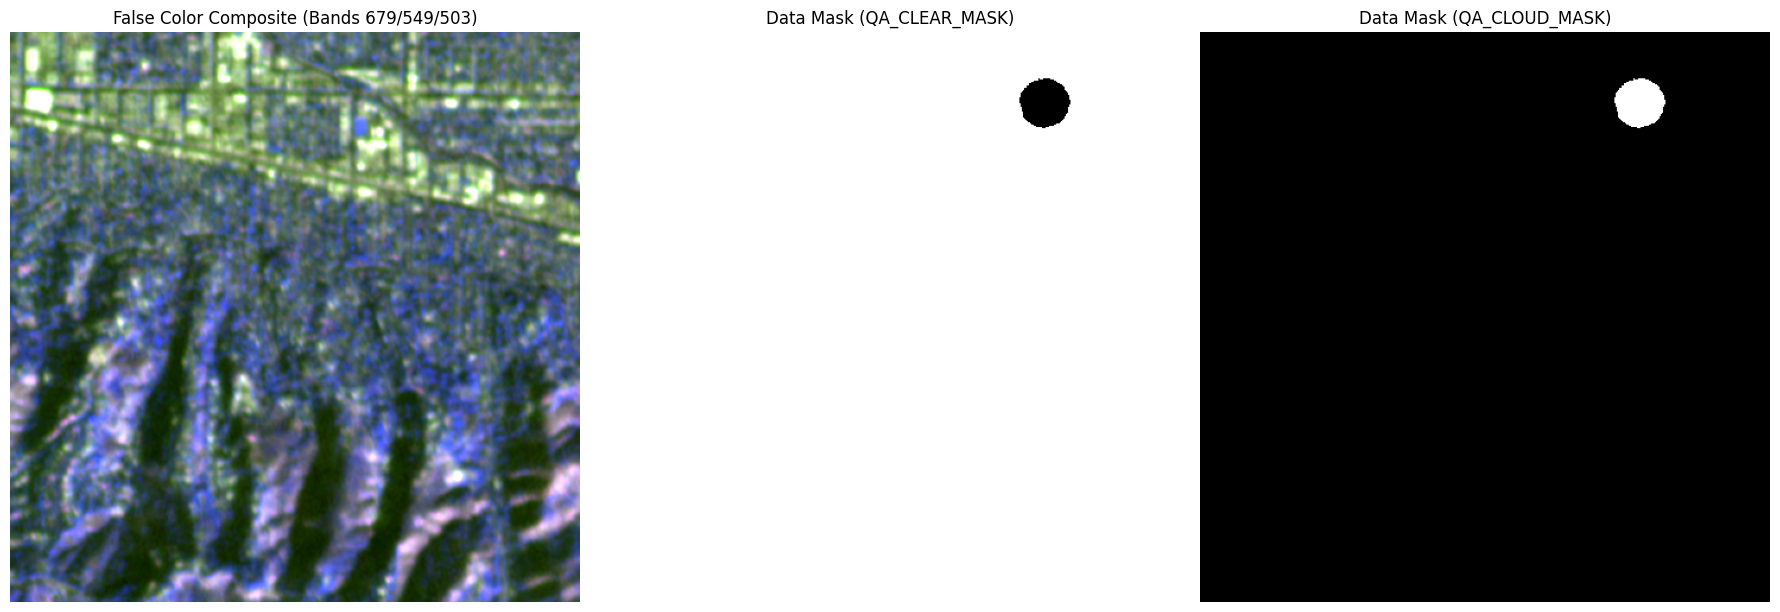

In [ ]:
import pyarrow.parquet as pq
import zlib
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# === Load the parquet
# df = pq.read_table("/content/output_scene_2400.parquet").to_pandas()
# print(len(df))
# === Select random index (or set manually)
i = np.random.randint(len(df))
print(f"Selected tile_id: {df.tile_id[i]}")

# === Decode arrays
# shape = tuple(df["shape"][i])
# img = np.frombuffer(zlib.decompress(df.image[i]), dtype=np.float32).reshape(shape)
# data_mask = np.frombuffer(zlib.decompress(df.data_mask[i]), dtype=np.uint8).reshape(shape)
# pixel_mask = np.frombuffer(zlib.decompress(df.pixel_quality_mask[i]), dtype=np.uint8).reshape(shape)

shape = tuple(df["shape"][i])  # image shape
h, w = shape[1], shape[2]
print(h,w)

img = np.frombuffer(zlib.decompress(df.image[i]), dtype=np.float32).reshape(shape)

# Data mask has 2 bands
data_mask = np.frombuffer(zlib.decompress(df.data_mask[i]), dtype=np.uint8).reshape((2, h, w))

# Pixel quality mask has 23 bands
pixel_mask = np.frombuffer(zlib.decompress(df.pixel_quality_mask[i]), dtype=np.uint8).reshape(shape)

# === Choose 3-band RGB composite (e.g. Band_679nm, Band_549nm, Band_503nm)
# Based on known Wyvern bands, assume: [Band_679nm=13, Band_549nm=4, Band_503nm=0]
bands = [13, 4, 21]
rgb = np.stack([img[b] for b in bands], axis=-1)
rgb = np.clip(rgb / np.percentile(rgb, 99), 0, 1)  # simple normalization

# === Create dummy grid cell geometry as extent
h, w = shape[1:]
pixel_size = 5  # meters
xmin, ymin = 0, 0
xmax, ymax = w * pixel_size, h * pixel_size
extent = [xmin, xmax, ymin, ymax]

# === Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RGB Image
axes[0].imshow(rgb)
axes[0].set_title("False Color Composite (Bands 679/549/503)")
axes[0].set_axis_off()

# Data mask
axes[1].imshow(data_mask[0], cmap='gray')
axes[1].set_title("Data Mask (QA_CLEAR_MASK)")
axes[1].set_axis_off()


axes[2].imshow(data_mask[1], cmap='gray')
axes[2].set_title("Data Mask (QA_CLOUD_MASK)")
axes[2].set_axis_off()

# # Pixel Quality Mask
# axes[2].imshow(pixel_mask[0], cmap='gray')
# axes[2].set_title("Pixel Quality Mask (Band 503nm)")
# axes[2].set_axis_off()

plt.tight_layout()
plt.show()


In [ ]:
len(df)

72